In [6]:
print(y)

              경도    위도  sog    cog
0     -72.660769  90.0  5.7  329.2
1     -72.660769  90.0  0.0  329.8
2     -72.660769  90.0  0.0  139.3
3     -72.660769  90.0  0.0  175.8
4     -72.660769  90.0  0.0    0.0
...          ...   ...  ...    ...
46809 -72.660769  90.0  0.1  360.0
46810 -72.660769  90.0  0.3  176.4
46811 -72.660769  90.0  5.3  331.3
46812 -72.660769  90.0  7.6  183.2
46813 -72.660769  90.0  0.0  217.0

[46814 rows x 4 columns]


In [7]:
print(data.insert_time)

0        1683799800
1        1683799800
2        1683799800
3        1683799800
4        1683799800
            ...    
46809    1683803340
46810    1683803340
46811    1683803340
46812    1683803340
46813    1683803400
Name: insert_time, Length: 46814, dtype: int64


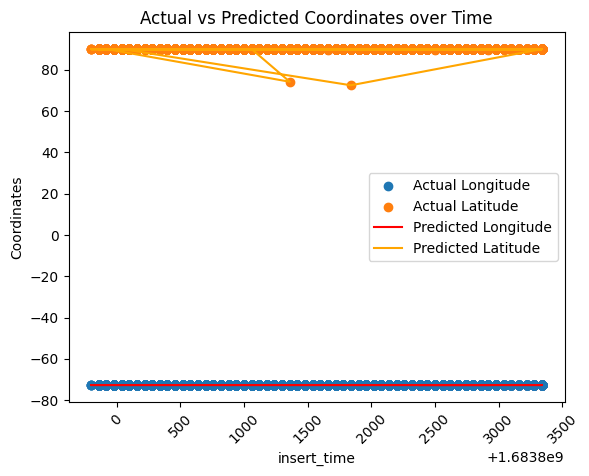

In [8]:
import matplotlib.pyplot as plt

# 이 선은 insert_time 값( )에 대한 실제 경도 값( )의 산점도를 생성
plt.scatter(X_test['insert_time'], y_test['경도'], label='Actual Longitude')

# 이 선은 insert_time 값( )에 대한 실제 위도 값( )의 산점도를 생성
plt.scatter(X_test['insert_time'], y_test['위도'], label='Actual Latitude')
plt.plot(X_test['insert_time'], y_pred[:, 0], color='red', label='Predicted Longitude')
plt.plot(X_test['insert_time'], y_pred[:, 1], color='orange', label='Predicted Latitude')

# 산점도의 각 점은 특정 insert_time의 실제 경도 값
plt.xlabel('insert_time')

plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates over Time')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
#위의 코드는 다음과 같은 작업을 수행

# pandas, sklearn 및 pyproj 라이브러리를 가져옵니다.
# 3857 좌표계에서 4326 좌표계로 좌표를 변환하기 위해 pyproj의 Transformer 객체를 생성합니다.
# convert_coordinates 함수를 정의합니다. 이 함수는 입력된 좌표를 3857 좌표계에서 4326 좌표계로 변환합니다.
# CSV 파일을 pandas의 read_csv 함수를 사용하여 읽어옵니다.
# 좌표 변환을 적용하기 위해 geom 열에 convert_coordinates 함수를 적용합니다.
# 변환된 좌표를 경도와 위도 열로 분리하여 데이터프레임에 저장합니다.
# 'insert_time' 열의 날짜 및 시간 값을 숫자로 변환합니다.
# 예측 변수(X)와 타깃 변수(y)를 설정합니다.
# train_test_split 함수를 사용하여 데이터를 학습 및 테스트 세트로 분할합니다.
# LinearRegression 모델을 생성하고 학습 데이터를 사용하여 모델을 훈련시킵니다.
# 테스트 데이터를 사용하여 예측을 수행하고, 예측 결과와 실제 값 간의 평균 제곱 오차(MSE)를 계산합니다.
# MSE 값을 출력합니다.
# 이 코드는 주어진 CSV 파일에서 좌표 값을 읽어와 3857 좌표계에서 4326 좌표계로 변환하고, 
# 변환된 좌표와 다른 변수들 간의 선형 회귀 모델을 학습하여 예측을 수행합니다. 이를 통해 모델의 예측 성능을 평가할 수 있는 MSE 값을 계산하고 출력합니다.

In [7]:
import binascii
from shapely import wkb
import pyproj

# 주어진 WKB 문자열
wkb_string = '0101000020110F0000000000C01F6C6B4100000000A0DB4F41'

# 1단계: 16진수 문자열을 2진수로 디코딩
binary_string = binascii.unhexlify(wkb_string)

# 2단계: 이진 문자열 구문 분석
geometry = wkb.loads(binary_string)

# 3단계: 좌표를 위도와 경도로 변환
if geometry and hasattr(geometry, 'wkt'):
    # WKT(Well-Known Text) 형식으로 변환
    wkt = geometry.wkt

    # 좌표계 변환 정의 3857 => 4326
    crs_from = pyproj.Proj(init='epsg:3857')
    crs_to = pyproj.Proj(init='epsg:4326')

    # 좌표 변환 수행
    transformed = pyproj.transform(crs_from, crs_to, geometry.x, geometry.y)

    # 위도와 경도 추출
    latitude, longitude = transformed[1], transformed[0]
    
    # Print the latitude and longitude values
    print(latitude, longitude)
else:
    print('Invalid geometry data')

 # 35.123838041911526 129.0551896853276
 # 35.11222830013471 129.0684757683797

35.08677660522958 129.1527107925716


c:\Users\SW\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\SW\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\SW\AppData\Local\Temp\ipykernel_15660\2472002647.py:24: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import binascii
from shapely import wkb
import pyproj
from pyproj import Transformer

def convert_wkb_to_coordinates(wkb_string):
    
    # 0단계 :Check if the value is a float
    if isinstance(wkb_string, float):
        return None, None
    
    # 1단계: 16진수 문자열을 이진 형식으로 디코딩
    binary_string = binascii.unhexlify(wkb_string)

    # 2단계: 이진 형식 파싱
    geometry = wkb.loads(binary_string)

    # 3단계: 좌표를 위도와 경도로 변환
    if geometry and hasattr(geometry, 'wkt'):
        # Well-Known Text (WKT) 형식으로 변환
        wkt = geometry.wkt

        # 좌표 시스템 변환 정의
        #!crs_from = pyproj.Proj(init='epsg:3857')
        #!crs_to = pyproj.Proj(init='epsg:4326')
        transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326")
        transformer.transform(12, 12)

        # 좌표 변환 수행
        #! transformed = pyproj.transform(crs_from, crs_to, geometry.x, geometry.y)
        transformed = Transformer.transform(transformer,geometry.x, geometry.y)

        # 위도와 경도 추출
        latitude, longitude = transformed[0], transformed[1]
        
        return latitude, longitude
    else:
        return None, None
    

# Load data from CSV file
data = pd.read_csv('D:/장우영/LOCALSEARCH/DA/DA/data/FAmerge_20230523_161834.csv', encoding='ANSI')

# 좌표 변환 적용 및 데이터프레임 업데이트
data[['latitude', 'longitude']] = data['geom'].apply(convert_wkb_to_coordinates).apply(pd.Series)

print(data[['latitude', 'longitude']].head(100))


# "insert_time"을 숫자로 변환
data['insert_time'] = pd.to_datetime(data['insert_time']).astype('int64') // 10**9
print(data['insert_time']) 
# 특성과 타겟 변수 선택

# X = data[["mmsi", "ship_type", "latitude", "longitude", "cog", "sog", "insert_time", "풍향", "유향", "기온", "수온", "풍속", "유속", "기압", "습도"]]
# y = data[["latitude", "longitude","cog", "sog"]]

# # 데이터를 훈련 세트와 테스트 세트로 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 선형 회귀 모델 생성 및 훈련
# model = LinearRegression()
# model.fit(X_train, y_train)

# # 목표 값 예측
# y_pred = model.predict(X_test)

# # 평균 오차값 예측
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

     latitude   longitude
0   35.039909  129.062547
1   35.123838  129.055190
2   35.095487  129.028698
3   35.118445  129.051632
4   35.123574  129.050914
..        ...         ...
95  35.083028  128.996242
96  34.712431  129.067003
97  35.078323  129.107256
98  35.119371  129.050914
99  35.088622  129.026821

[100 rows x 2 columns]
0        1683799800
1        1683799800
2        1683799800
3        1683799800
4        1683799800
            ...    
47994    1683803520
47995    1683803520
47996    1683803520
47997    1683803520
47998    1683803520
Name: insert_time, Length: 47999, dtype: int64


In [15]:
# Load data from CSV file
data = pd.read_csv('D:/장우영/LOCALSEARCH/DA/DA/data/FAmerge_20230531_103345.csv', encoding='ANSI')
print(data.insert_time)

0        2023-05-11 10:10:58
1        2023-05-11 10:10:58
2        2023-05-11 10:10:58
3        2023-05-11 10:10:58
4        2023-05-11 10:10:58
                ...         
52732    2023-05-11 11:19:59
52733    2023-05-11 11:19:59
52734    2023-05-11 11:19:59
52735    2023-05-11 11:19:59
52736    2023-05-11 11:19:59
Name: insert_time, Length: 52737, dtype: object


In [18]:
# "insert_time"을 숫자로 변환
data['insert_time'] = pd.to_datetime(data['insert_time']).astype('int64') // 10**9

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import binascii
from shapely import wkb
import pyproj
from pyproj import Transformer

def convert_wkb_to_coordinates(wkb_string):
    
    # 0단계 :Check if the value is a float
    if isinstance(wkb_string, float):
        return None, None
    
    # 1단계: 16진수 문자열을 이진 형식으로 디코딩
    binary_string = binascii.unhexlify(wkb_string)

    # 2단계: 이진 형식 파싱
    geometry = wkb.loads(binary_string)

    # 3단계: 좌표를 위도와 경도로 변환
    if geometry and hasattr(geometry, 'wkt'):
        # Well-Known Text (WKT) 형식으로 변환
        wkt = geometry.wkt

        # 좌표 시스템 변환 정의
        #!crs_from = pyproj.Proj(init='epsg:3857')
        #!crs_to = pyproj.Proj(init='epsg:4326')
        transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326")
        transformer.transform(12, 12)

        # 좌표 변환 수행
        #! transformed = pyproj.transform(crs_from, crs_to, geometry.x, geometry.y)
        transformed = Transformer.transform(transformer,geometry.x, geometry.y)

        # 위도와 경도 추출
        latitude, longitude = transformed[0], transformed[1]
        
        return latitude, longitude
    else:
        return None, None
    

# Load data from CSV file
data = pd.read_csv('D:/장우영/LOCALSEARCH/DA/DA/data/FAmerge_20230531_103345.csv', encoding='ANSI')



# 좌표 변환 적용 및 데이터프레임 업데이트
data[['latitude', 'longitude']] = data['geom'].apply(convert_wkb_to_coordinates).apply(pd.Series)


# 특정 칼럼의 조건에 따라 데이터 필터링
filtered_data = data[data['sog'] > 3]  # 특정 칼럼과 조건을 적절히 수정해야 합니다

data= filtered_data


# "insert_time"을 숫자로 변환
#data['insert_time'] = pd.to_datetime(data['insert_time']).astype('int64') // 10**9
#data['insert_time'] = pd.to_datetime(data['insert_time'])
data['year'] = pd.to_datetime(data['insert_time']).dt.year
data['month'] = pd.to_datetime(data['insert_time']).dt.month
data['day'] = pd.to_datetime(data['insert_time']).dt.day
data['hour'] = pd.to_datetime(data['insert_time']).dt.hour
data['minute'] = pd.to_datetime(data['insert_time']).dt.minute
data['second'] = pd.to_datetime(data['insert_time']).dt.minute

#print(data['insert_time'])

#특성과 타겟 변수 선택

X = data[["mmsi", "ship_type", "latitude", "longitude", "cog", "sog", "year", "month", "day", "hour", "minute", "second", "풍향", "유향", "기온", "수온", "풍속", "유속", "기압", "습도"]]
y = data[["latitude", "longitude","cog", "sog"]]

print(X)


# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 목표 값 예측
y_pred = model.predict(X_test)

# 평균 오차값 예측
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

            mmsi  ship_type   latitude   longitude    cog   sog  year  month   
0      440051540          0  35.039909  129.062547  329.2   5.7  2023      5  \
5      538010219          0  34.882612  129.060553  212.2  16.1  2023      5   
17     440051540          0  35.039909  129.062547  329.2   5.7  2023      5   
19     440102990          0  35.099860  129.041436   42.6   8.8  2023      5   
20     440048210         80  35.064618  129.110167   31.6   9.6  2023      5   
...          ...        ...        ...         ...    ...   ...   ...    ...   
52705  440135680          0  34.958493  129.193000  306.5  10.1  2023      5   
52708  440658000         70  35.042145  129.170300  239.4   7.5  2023      5   
52709  440761000         71  35.019416  129.126246  210.0   7.6  2023      5   
52714  440003510          0  35.035548  129.038131   90.6  15.3  2023      5   
52726  563156900         71  34.813431  129.000033   49.5  11.8  2023      5   

       day  hour  minute  second   풍향  

In [2]:
import pickle

# 모델 저장
with open('linear_regression_linearmodel_.pkl', 'wb') as file:
    pickle.dump(model, file)
    import pickle

# 모델을 불러오기 위해 pickle 파일을 엽니다.
model = pickle.load(open('linear_regression_linearmodel_.pkl', 'rb'))